# Neural Style Transfer with TensorFlow Hub

This notebook implements neural style transfer using Google's pre-trained TensorFlow Hub model, with PIL-based image loading for better compatibility.

In [1]:
# Install required packages
!pip install tensorflow tensorflow-hub pillow matplotlib numpy

In [5]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
import os

## Load and Preprocess Images with PIL

Successfully loaded image: content.jpg
Successfully loaded image: style.jpg
Resized image to 512x405


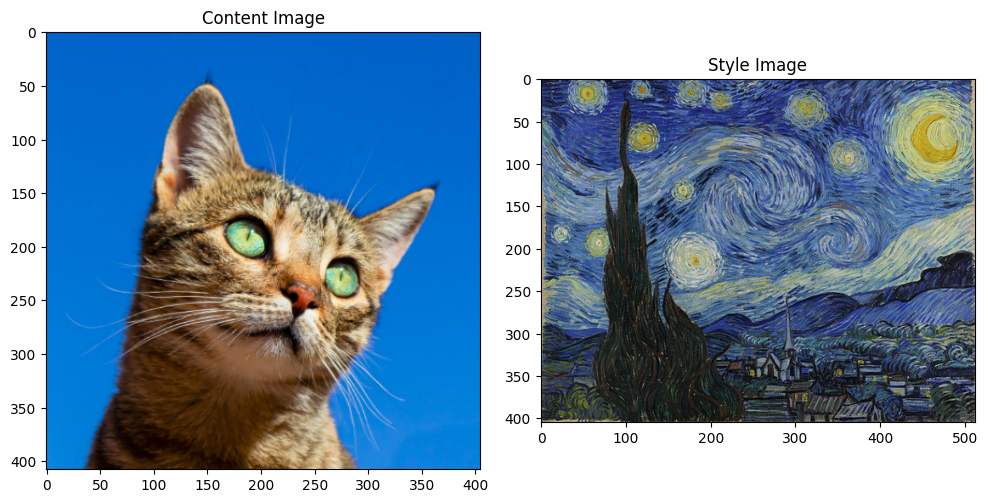

In [19]:
# Load images using PIL for better compatibility
def load_img_with_pil(path_to_img, max_dim=512):
    # Open and resize image using PIL
    try:
        img = Image.open(path_to_img).convert('RGB')
        print(f"Successfully loaded image: {path_to_img}")
        
        # Calculate new dimensions
        width, height = img.size
        if max(width, height) > max_dim:
            if width > height:
                new_width = max_dim
                new_height = int(height * max_dim / width)
            else:
                new_height = max_dim
                new_width = int(width * max_dim / height)
            
            img = img.resize((new_width, new_height), Image.LANCZOS)
            print(f"Resized image to {new_width}x{new_height}")
        
        # Convert to numpy array and then to tensor
        img_array = np.array(img).astype(np.float32) / 255.0
        img_tensor = tf.convert_to_tensor(img_array)
        img_tensor = img_tensor[tf.newaxis, :]
        return img_tensor
        
    except Exception as e:
        print(f"Error loading image {path_to_img}: {str(e)}")
        raise

# Convert tensor to image
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        tensor = tensor[0]
    return Image.fromarray(tensor)

# Check if files exist
content_path = 'content.jpg'
style_path = 'style.jpg'

if not os.path.exists(content_path):
    print(f"Warning: Content image file not found at {content_path}")
if not os.path.exists(style_path):
    print(f"Warning: Style image file not found at {style_path}")

# Load content and style images
content_image = load_img_with_pil(content_path)
style_image = load_img_with_pil(style_path)

# Display original images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.array(tensor_to_image(content_image)))
plt.title('Content Image')

plt.subplot(1, 2, 2)
plt.imshow(np.array(tensor_to_image(style_image)))
plt.title('Style Image')

plt.tight_layout()
plt.show()

## Load TensorFlow Hub Model and Perform Style Transfer

In [20]:
# Load TF Hub model
print("Loading TensorFlow Hub model...")
try:
    hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
    print("Model loaded successfully")
except Exception as e:
    print(f"Error loading model: {str(e)}")
    raise

# Function to perform style transfer
def run_style_transfer(content_image, style_image):
    try:
        # Run the model
        start = time.time()
        stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
        end = time.time()
        print(f"Style transfer took {end-start:.1f} seconds")
        return stylized_image
    except Exception as e:
        print(f"Error during style transfer: {str(e)}")
        raise

# Perform style transfer
print("Running style transfer...")
stylized_image = run_style_transfer(content_image, style_image)

Loading TensorFlow Hub model...
Model loaded successfully
Running style transfer...
Style transfer took 2.3 seconds


## Display and Save Result

Saved stylized image to 'stylized_tf_hub.jpg'


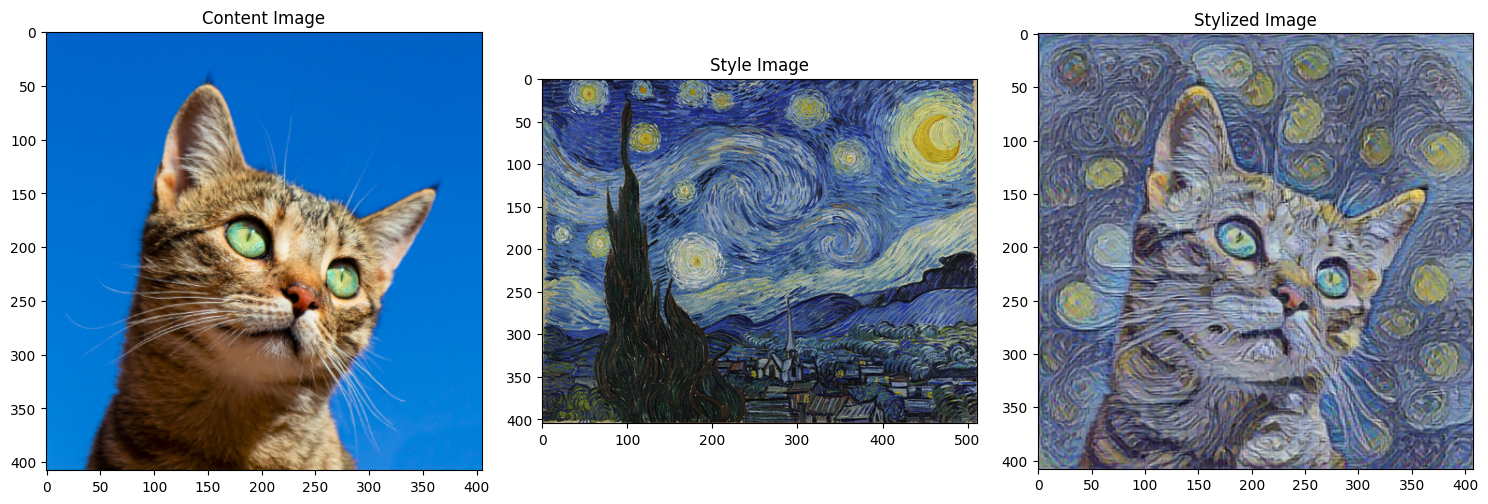

In [21]:
# Save result
result_img = tensor_to_image(stylized_image)
result_img.save('stylized_tf_hub.jpg')
print("Saved stylized image to 'stylized_tf_hub.jpg'")

# Display all three images
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(np.array(tensor_to_image(content_image)))
plt.title('Content Image')

plt.subplot(1, 3, 2)
plt.imshow(np.array(tensor_to_image(style_image)))
plt.title('Style Image')

plt.subplot(1, 3, 3)
plt.imshow(np.array(result_img))
plt.title('Stylized Image')

plt.tight_layout()
plt.show()